<a href="https://colab.research.google.com/github/khoabom02/AI_Basic/blob/main/Midterm_Report/Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
## Data using for trainning
folder = '/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Data/'
photos_train, labels_train = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('BanhMi'):
    output=1.0
  if file.startswith('Banhxeo'):
    output=2.0
  if file.startswith('CaKho'):
    output=3.0
  if file.startswith('ChaGio'):
    output=4.0
  if file.startswith('Coffee'):
    output=5.0
  if file.startswith('ComTam'):
    output=6.0
  if file.startswith('DauhuChien'):
    output=7.0
  if file.startswith('GoiCuon'):
    output=8.0
  if file.startswith('MiTom'):
    output=9.0
  if file.startswith('PhoBo'):
    output=10.0
  photo = load_img(folder + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos_train.append(photo)
  labels_train.append(output)
photos_train = asarray(photos_train)
labels_train = asarray(labels_train)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Train/Food_train_photos.npy',photos_train)
save('/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Train/Food_train_labels.npy',labels_train)

(193, 150, 150, 3) (193,)


In [ ]:
## Data using for testing
folder_test = '/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Data/'
photos_test, labels_test = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith(':BanhMi'):
    output=1.0
  if file.startswith('Banhxeo'):
    output=2.0
  if file.startswith('CaKho'):
    output=3.0
  if file.startswith('ChaGio'):
    output=4.0
  if file.startswith('Coffee'):
    output=5.0
  if file.startswith('ComTam'):
    output=6.0
  if file.startswith('DauhuChien'):
    output=7.0
  if file.startswith('GoiCuon'):
    output=8.0
  if file.startswith('MiTom'):
    output=9.0
  if file.startswith('PhoBo'):
    output=10.0
  photo_t = load_img(folder_test + file, target_size = (150,150))
  photo_t = img_to_array(photo_t)
  photos_test.append(photo_t)
  labels_test.append(output)
photos_test = asarray(photos_test)
labels_test = asarray(labels_test)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Test/Food_test_photos.npy',photos_test)
save('/content/drive/MyDrive/Data_train_AI/data_train/food/Food_Test/Food_test_labels.npy',labels_test)

(193, 150, 150, 3) (193,)


In [ ]:
## Convert to Gray Image
photos_train = photos_train.astype('float')/255.0
photos_test = photos_test.astype('float')/255.0

In [ ]:
## one hot encoding
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
print(labels_train.shape)
print(labels_test.shape)

(193, 11)
(193, 11)


In [ ]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
#-------------------------------------# 
batch_size = 64
epochs = 40
classes = 11

In [ ]:
# Split data into train and test sets
split_index = int(0.1 * len(photos_test))
test_x, test_y = photos_train[:split_index], labels_train[:split_index]
train_x, train_y = photos_test[split_index:], labels_test[split_index:]

In [ ]:
## Create Model
model=Sequential()
## Convolution 
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(150,150,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#----------------------------------------------#
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

In [ ]:
## Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation= 'softmax'))

In [ ]:
## Compile Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                  

In [ ]:
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

In [ ]:
## Train Model
train = model.fit(photos_train, labels_train, batch_size, epochs=epochs, verbose=1, validation_data = (test_x, test_y))
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)
print('Loss:', test_loss)

Epoch 1/40
4/4 [==============================] - 14s 318ms/step - loss: 5.2553 - accuracy: 0.0777 - val_loss: 3.1761 - val_accuracy: 0.0000e+00
Epoch 2/40
4/4 [==============================] - 0s 62ms/step - loss: 3.0963 - accuracy: 0.0933 - val_loss: 3.6956 - val_accuracy: 0.0000e+00
Epoch 3/40
4/4 [==============================] - 0s 61ms/step - loss: 2.5877 - accuracy: 0.1036 - val_loss: 2.3680 - val_accuracy: 0.0000e+00
Epoch 4/40
4/4 [==============================] - 0s 60ms/step - loss: 2.3289 - accuracy: 0.1140 - val_loss: 2.3416 - val_accuracy: 0.0000e+00
Epoch 5/40
4/4 [==============================] - 0s 62ms/step - loss: 2.2736 - accuracy: 0.1244 - val_loss: 1.5274 - val_accuracy: 0.1053
Epoch 6/40
4/4 [==============================] - 0s 60ms/step - loss: 2.2945 - accuracy: 0.1347 - val_loss: 2.4038 - val_accuracy: 0.0000e+00
Epoch 7/40
4/4 [==============================] - 0s 61ms/step - loss: 2.1562 - accuracy: 0.2487 - val_loss: 3.1621 - val_accuracy: 0.0000e+00
E

In [ ]:
## Save Model
model.save('/content/drive/MyDrive/Data_train_AI/data_train/food/model_Food.h5')

<ipython-input-26-d164d1ce7a5b>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')


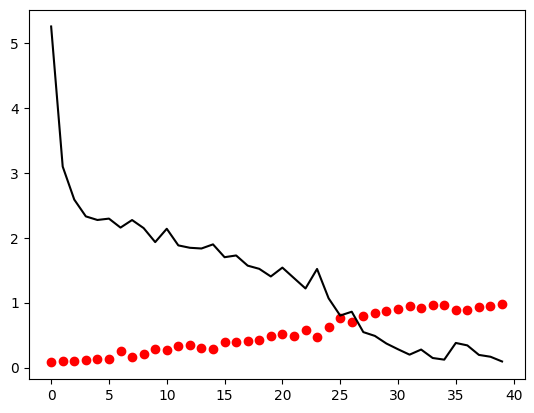

In [ ]:
## Evaluate the accuracy
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
## Graphing
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='red')
plt.plot(epochs,loss , 'k', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 149ms/step
PhoBo


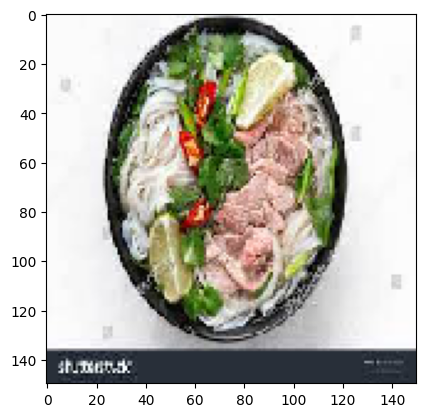

1/1 [==============================] - 0s 27ms/step
Banhxeo


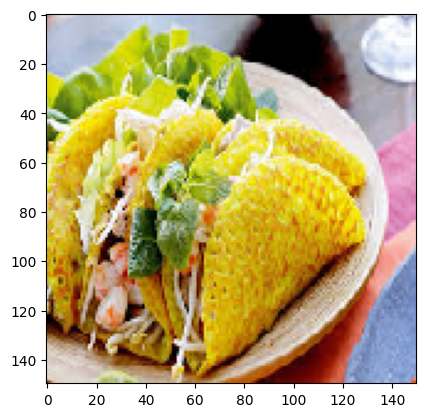

1/1 [==============================] - 0s 26ms/step
MiTom


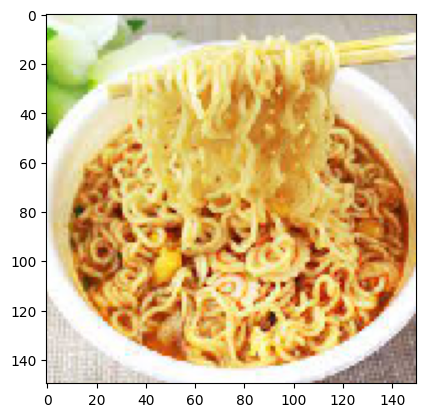

1/1 [==============================] - 0s 59ms/step
ComTam


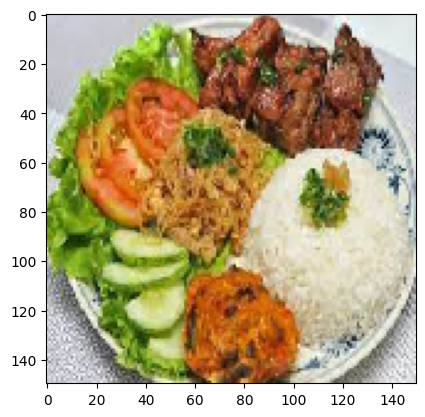

1/1 [==============================] - 0s 29ms/step
GoiCuon


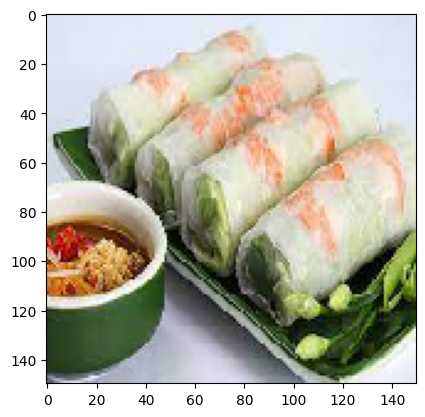

1/1 [==============================] - 0s 33ms/step
ChaGio


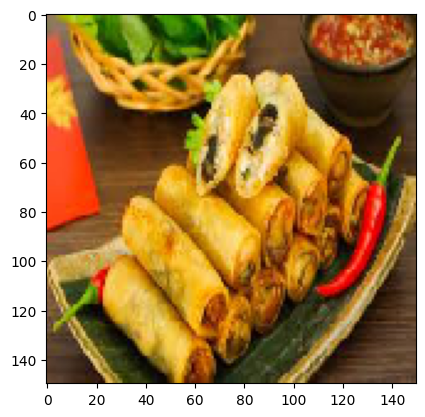

1/1 [==============================] - 0s 28ms/step
Coffee


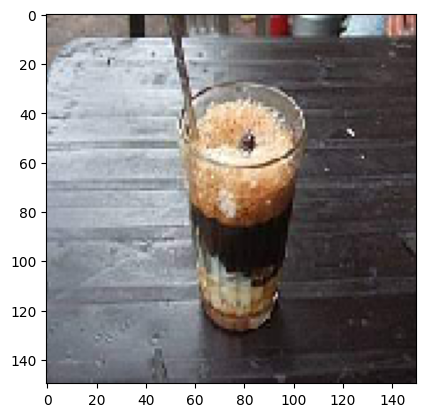

1/1 [==============================] - 0s 62ms/step
CaKho


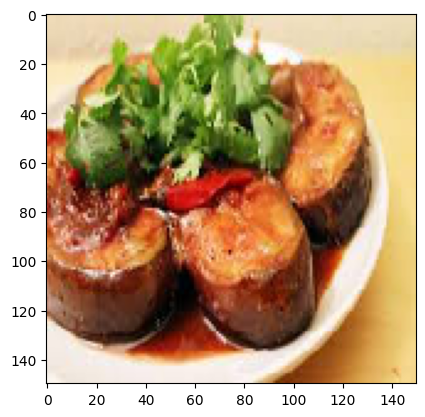

1/1 [==============================] - 0s 18ms/step
DauHuChien


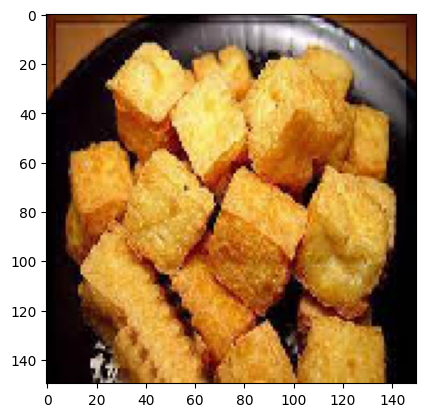

1/1 [==============================] - 0s 18ms/step
BanhMi


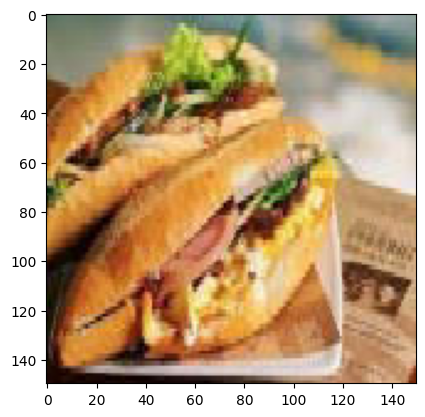

In [ ]:
## Test
from os import listdir
import numpy as np
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Data_train_AI/data_train/food/Data_Test'
for file in listdir(folder):
  photos = load_img(folder + '/' +  file, target_size = (150, 150))
  plt.imshow(photos)
  photo = load_img(folder + '/' +  file, target_size = (150, 150))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['BanhMi', 'Banhxeo',
              'CaKho', 'ChaGio', 'Coffee', 
              'ComTam', 'DauHuChien','GoiCuon','MiTom','PhoBo']
  print(class_name[result - 1])
  plt.show()